In [4]:
#import packages
library(ggplot2)
library(dplyr)
library(ggsignif)
library(corrplot)
library(caret)
library(pROC)
library(rpart)
library(randomForest)
library(kknn)
library(rpart.plot) 

1.Load Data

In [5]:
#inport data
ds_row=read.csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv", stringsAsFactors = FALSE, header = TRUE)

2. Check Data

In [6]:
#inspect data
head(ds_row)
summary(ds_row)
str(ds_row)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [7]:
ds<-as.data.frame(apply(ds_row,2,function(ds_row) as.numeric(ds_row)))
ds <- mutate(ds, Outcome = as.factor(ds$Outcome))
str(ds)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : num  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : num  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : num  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : num  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : num  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : Factor w/ 2 levels "0","1": 2 1 2 1 2 1 2 1 2 2 ...


In [8]:
apply(ds,2, function(x){sum(is.na(x))/length(x)})

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

3. EDA

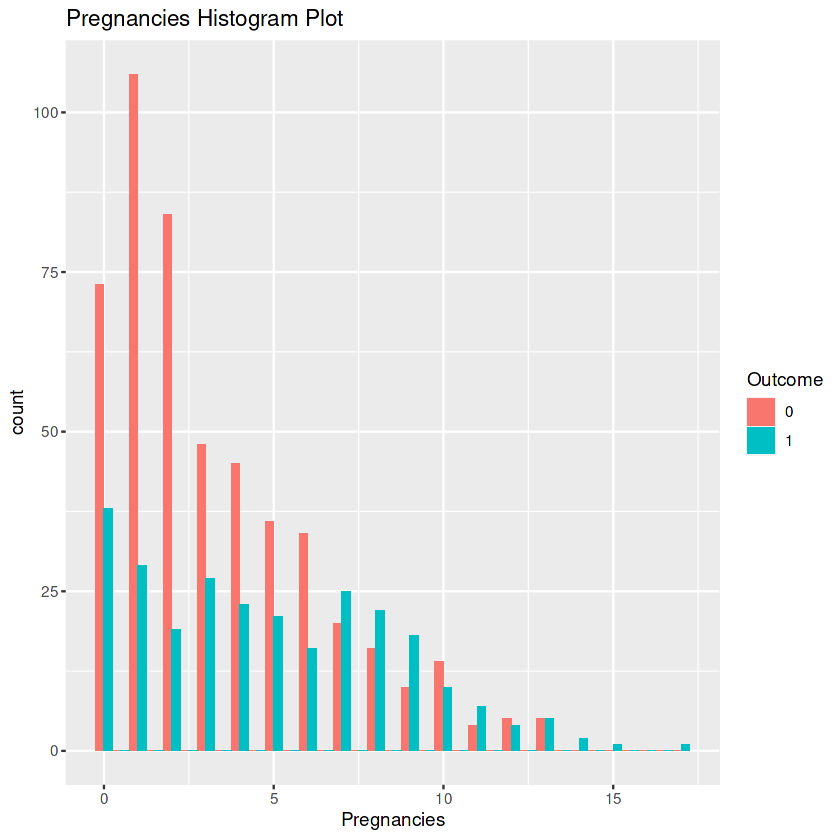

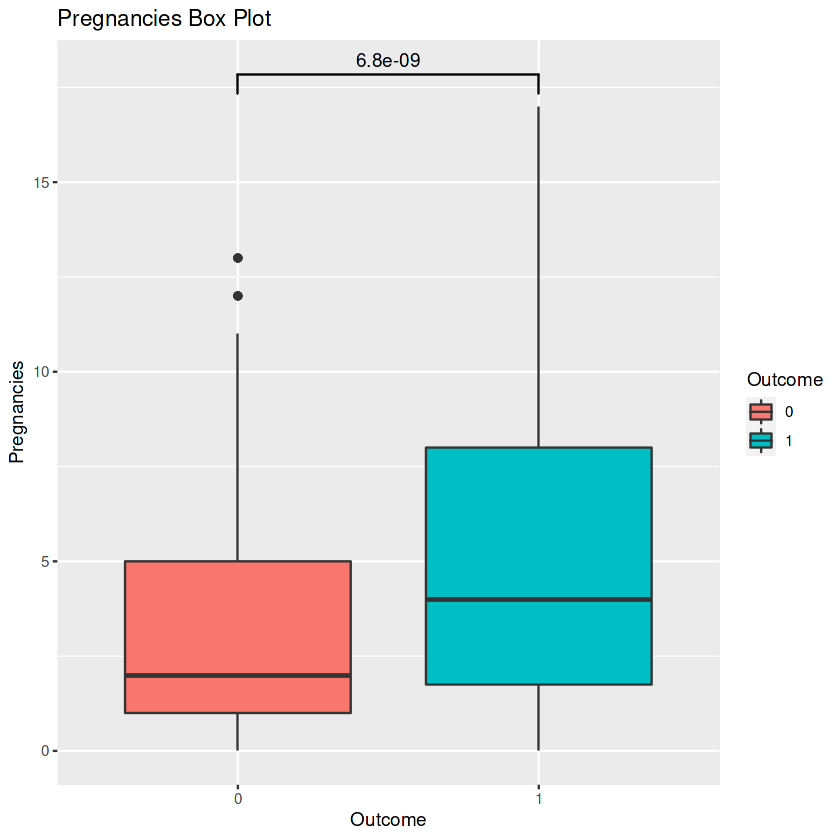

In [9]:
#visualisation
#Pregnancies
Pregnancies_Histogram_Plot <- ggplot(ds, aes(Pregnancies, fill = Outcome))+
  geom_histogram(position = "dodge", binwidth = 0.5)+
  labs(title = "Pregnancies Histogram Plot")
print(Pregnancies_Histogram_Plot)

compared_list = list(c('1', '0'))  

Pregnancies_Box_Plot <- ggplot(ds, aes(Outcome, Pregnancies,fill = Outcome))+
  geom_boxplot()+
  geom_signif(comparisons = compared_list, test = t.test)+
  labs(title = "Pregnancies Box Plot")
print(Pregnancies_Box_Plot)

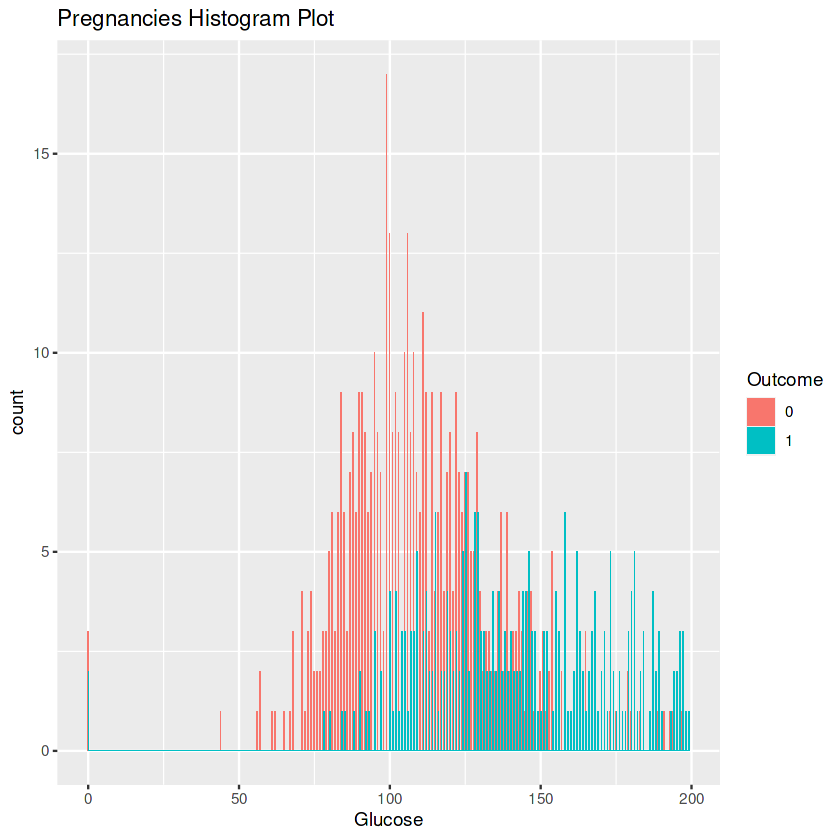

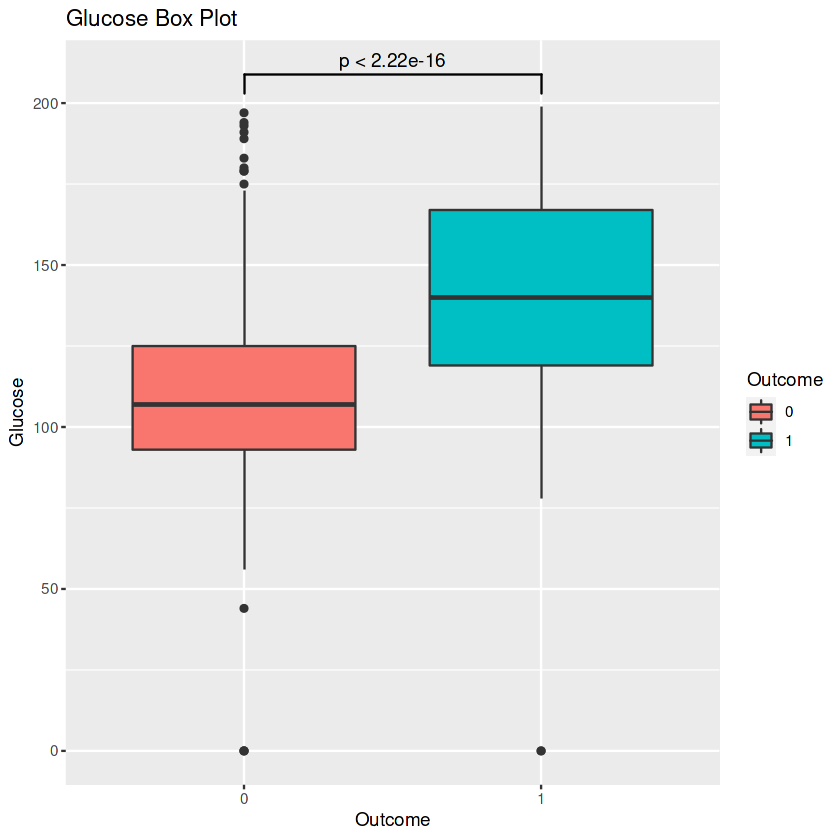

In [10]:
#Glucose
Glucose_Histogram_Plot <- ggplot(ds, aes(Glucose, fill = Outcome))+
  geom_histogram(position = "dodge", binwidth = 0.5)+
  labs(title = "Glucose Histogram Plot")
print(Glucose_Histogram_Plot)


Glucose_Box_Plot <- ggplot(ds, aes(Outcome, Glucose, fill = Outcome))+
  geom_boxplot()+
  geom_signif(comparisons = compared_list, test = t.test)+
  labs(title = "Glucose Box Plot")
print(Glucose_Box_Plot)

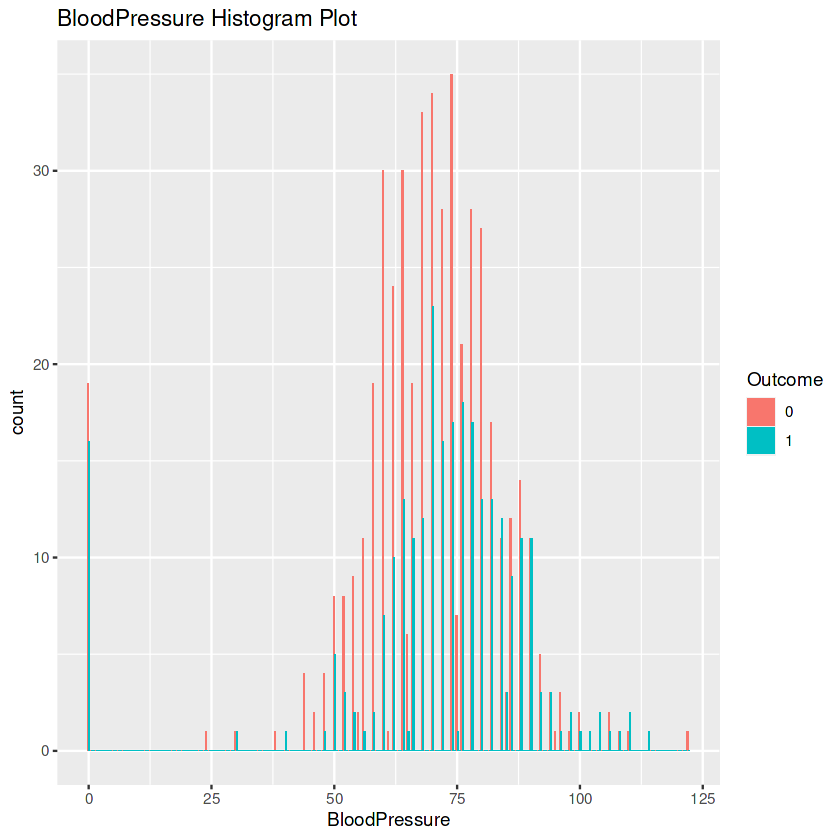

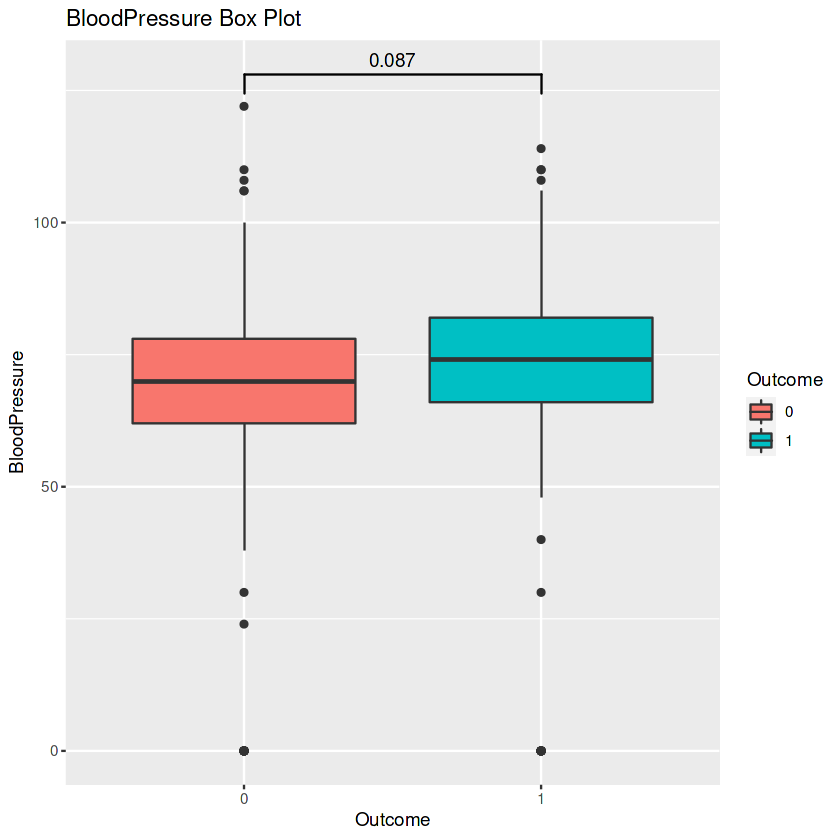

In [11]:
#BloodPressure
BloodPressure_Histogram_Plot <- ggplot(ds, aes(BloodPressure, fill = Outcome))+
  geom_histogram(position = "dodge", binwidth = 0.5)+
  labs(title = "BloodPressure Histogram Plot")
print(BloodPressure_Histogram_Plot)

BloodPressure_Box_Plot <- ggplot(ds, aes(Outcome, BloodPressure, fill = Outcome))+
  geom_boxplot()+
  geom_signif(comparisons = compared_list, test = t.test)+
  labs(title = "BloodPressure Box Plot")
print(BloodPressure_Box_Plot)

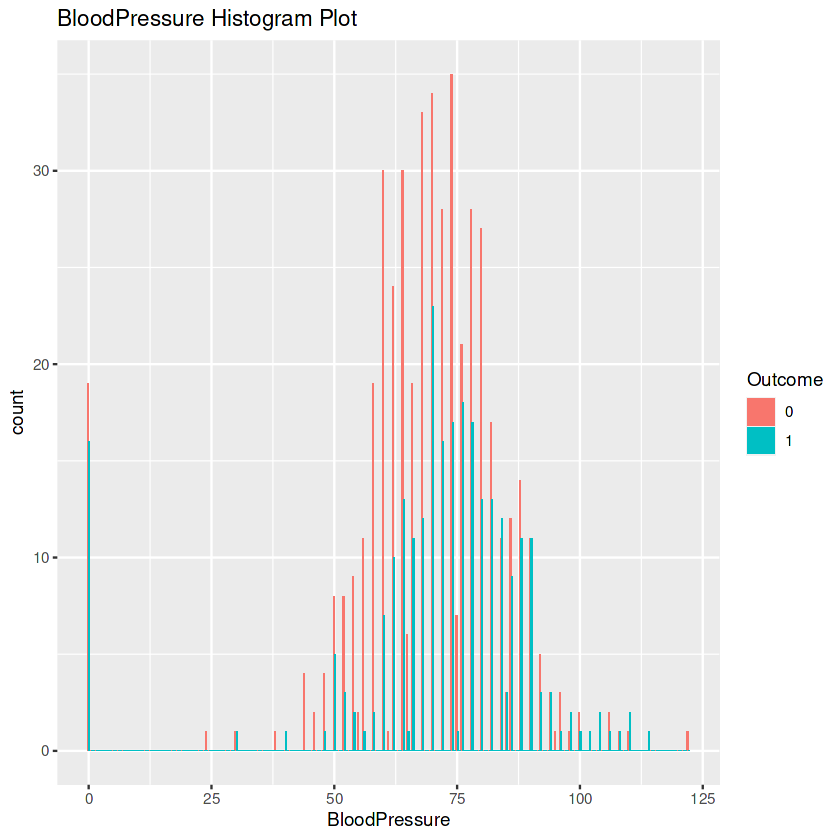

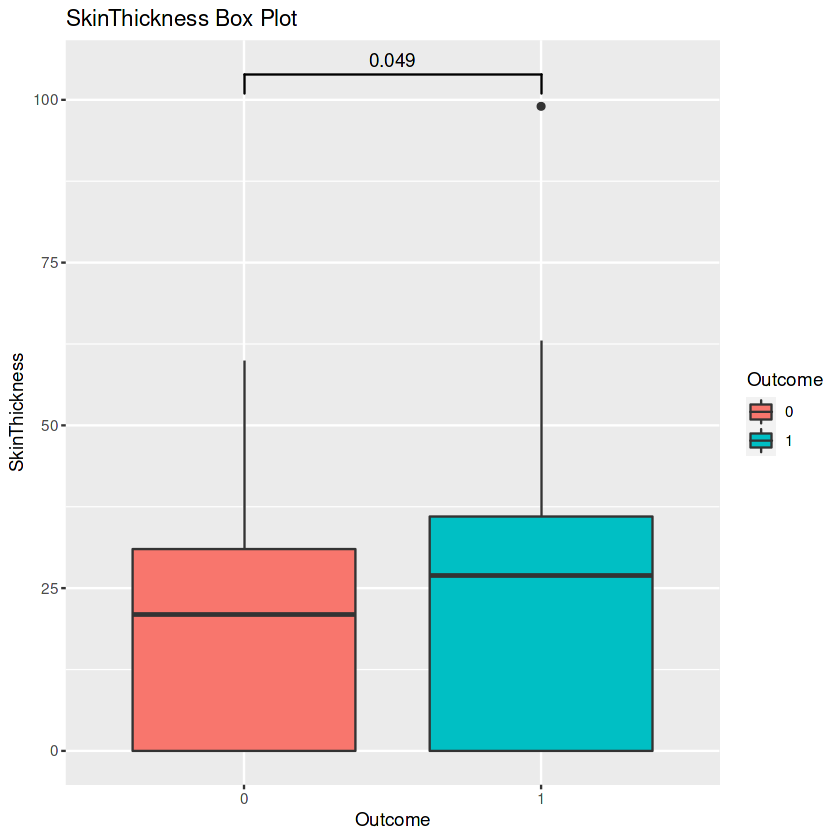

In [12]:
#SkinThickness
SkinThickness_Histogram_Plot <- ggplot(ds, aes(SkinThickness, fill = Outcome))+
  geom_histogram(position = "dodge", binwidth = 0.5)+
  labs(title = "SkinThickness Histogram Plot")
print(SkinThickness_Histogram_Plot)

SkinThickness_Box_Plot <- ggplot(ds, aes(Outcome, SkinThickness, fill = Outcome))+
  geom_boxplot()+
  geom_signif(comparisons = compared_list, test = t.test)+
  labs(title = "SkinThickness Box Plot")
print(SkinThickness_Box_Plot)

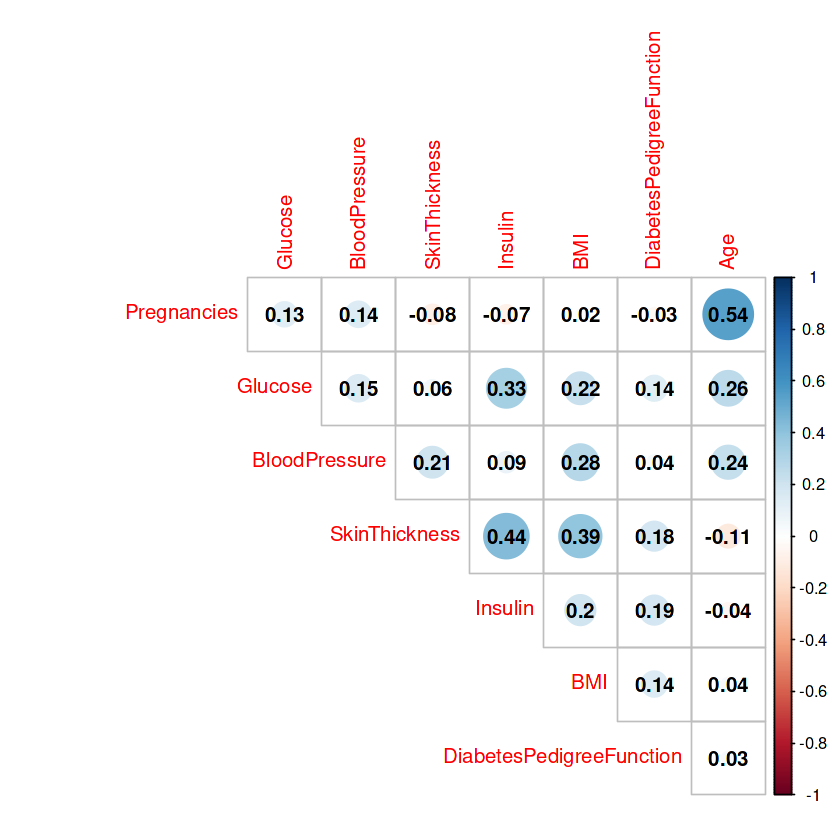

In [13]:
#correlation
corrplot(cor(ds[,-9]),type="upper",addCoef.col="black",diag = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



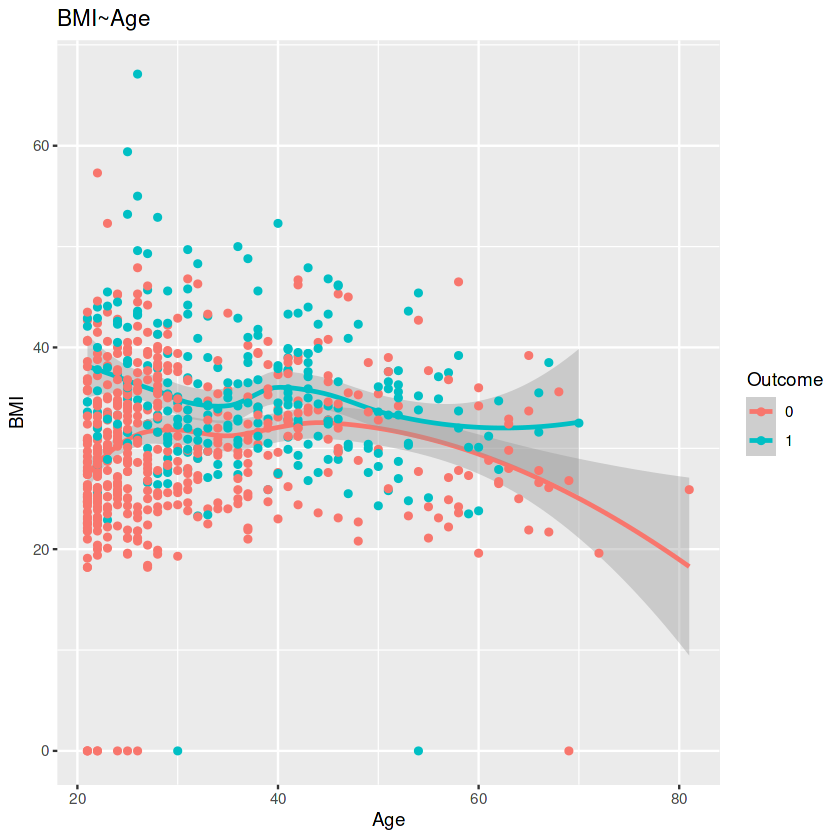

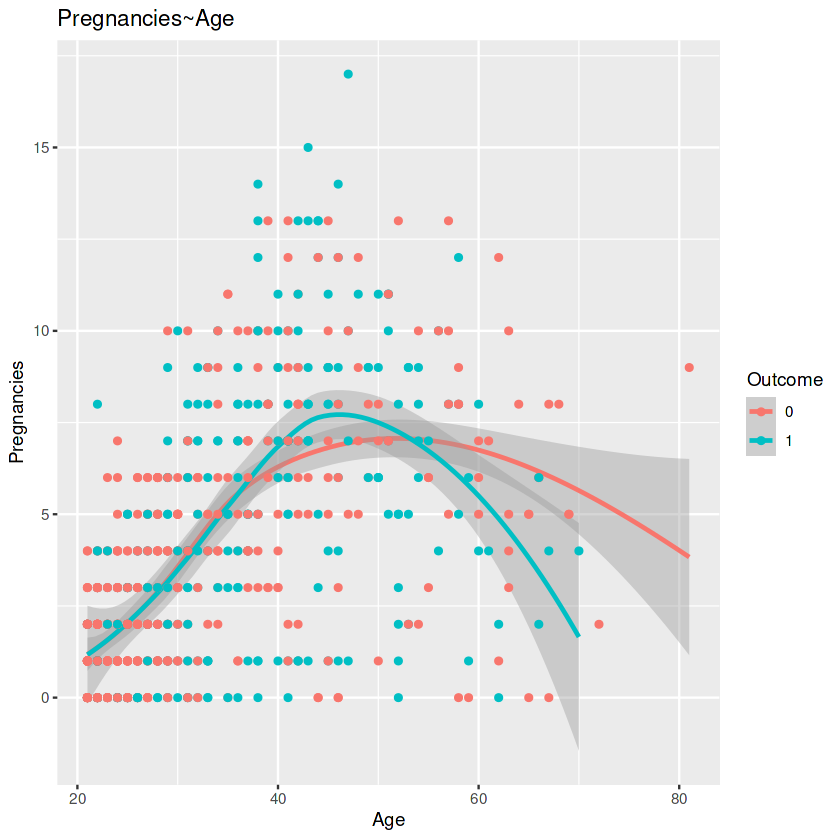

In [14]:
BMI_Age <- ggplot(ds,aes(Age, BMI, color = Outcome)) +
  geom_smooth()+
  geom_point()+ 
  ggtitle("BMI~Age")
print(BMI_Age)
 

Pregnancies_Age <- ggplot(ds,aes(Age, Pregnancies, color = Outcome)) +
  geom_smooth()+
  geom_point()+ 
  ggtitle("Pregnancies~Age")
print(Pregnancies_Age)

4.Classification

In [15]:
#Pre-processing
d.stand <- as.data.frame(scale(ds[,1:8]))
sapply(d.stand,sd) 
sapply(d.stand,mean)
d_stand_Outcome <- mutate(d.stand, Outcome = as.factor(ds$Outcome))

Pregnancies                  Glucose            BloodPressure 
                       1                        1                        1 
           SkinThickness                  Insulin                      BMI 
                       1                        1                        1 
DiabetesPedigreeFunction                      Age 
                       1                        1

Pregnancies                  Glucose            BloodPressure 
           -6.901102e-17            -3.640265e-18             1.177826e-17 
           SkinThickness                  Insulin                      BMI 
            4.668542e-17            -4.414552e-17            -1.971323e-16 
DiabetesPedigreeFunction                      Age 
            6.894834e-17             1.987660e-16

In [16]:
#classification
index <- createDataPartition(d_stand_Outcome$Outcome, p = 0.80, list = FALSE)
# select 20% of the data for testing
testset <- d_stand_Outcome[-index,]
# select 80% of data to train the models
trainset <- d_stand_Outcome[index,]

In [17]:
#logistic regression
set.seed(1234)
fit.logit <- glm(Outcome~., data = trainset, family  =binomial())
summary(fit.logit)
logit.fit.reduced <- step(fit.logit)
summary(logit.fit.reduced)


Call:
glm(formula = Outcome ~ ., family = binomial(), data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4883  -0.7318  -0.4184   0.7483   2.8749  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.82380    0.10644  -7.740 9.98e-15 ***
Pregnancies               0.42743    0.12060   3.544 0.000394 ***
Glucose                   1.07980    0.12896   8.373  < 2e-16 ***
BloodPressure            -0.26411    0.11479  -2.301 0.021398 *  
SkinThickness             0.03331    0.12537   0.266 0.790457    
Insulin                  -0.10403    0.11927  -0.872 0.383079    
BMI                       0.63556    0.13197   4.816 1.47e-06 ***
DiabetesPedigreeFunction  0.27135    0.10745   2.525 0.011559 *  
Age                       0.22968    0.12693   1.809 0.070375 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null devi

Start:  AIC=604.83
Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + 
    Insulin + BMI + DiabetesPedigreeFunction + Age

                           Df Deviance    AIC
- SkinThickness             1   586.90 602.90
- Insulin                   1   587.59 603.59
<none>                          586.83 604.83
- Age                       1   590.10 606.10
- BloodPressure             1   592.20 608.20
- DiabetesPedigreeFunction  1   593.42 609.42
- Pregnancies               1   599.85 615.85
- BMI                       1   613.20 629.20
- Glucose                   1   675.71 691.71

Step:  AIC=602.9
Outcome ~ Pregnancies + Glucose + BloodPressure + Insulin + BMI + 
    DiabetesPedigreeFunction + Age

                           Df Deviance    AIC
- Insulin                   1   587.61 601.61
<none>                          586.90 602.90
- Age                       1   590.11 604.11
- BloodPressure             1   592.22 606.22
- DiabetesPedigreeFunction  1   593.63 607.63
- Pre


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BloodPressure + 
    BMI + DiabetesPedigreeFunction + Age, family = binomial(), 
    data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6465  -0.7335  -0.4244   0.7535   2.8601  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -0.8251     0.1064  -7.754 8.91e-15 ***
Pregnancies                0.4259     0.1201   3.547  0.00039 ***
Glucose                    1.0438     0.1212   8.615  < 2e-16 ***
BloodPressure             -0.2627     0.1123  -2.339  0.01934 *  
BMI                        0.6327     0.1234   5.126 2.96e-07 ***
DiabetesPedigreeFunction   0.2628     0.1063   2.472  0.01343 *  
Age                        0.2434     0.1244   1.957  0.05030 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 796.05  on 614  degrees of freedom
Residu

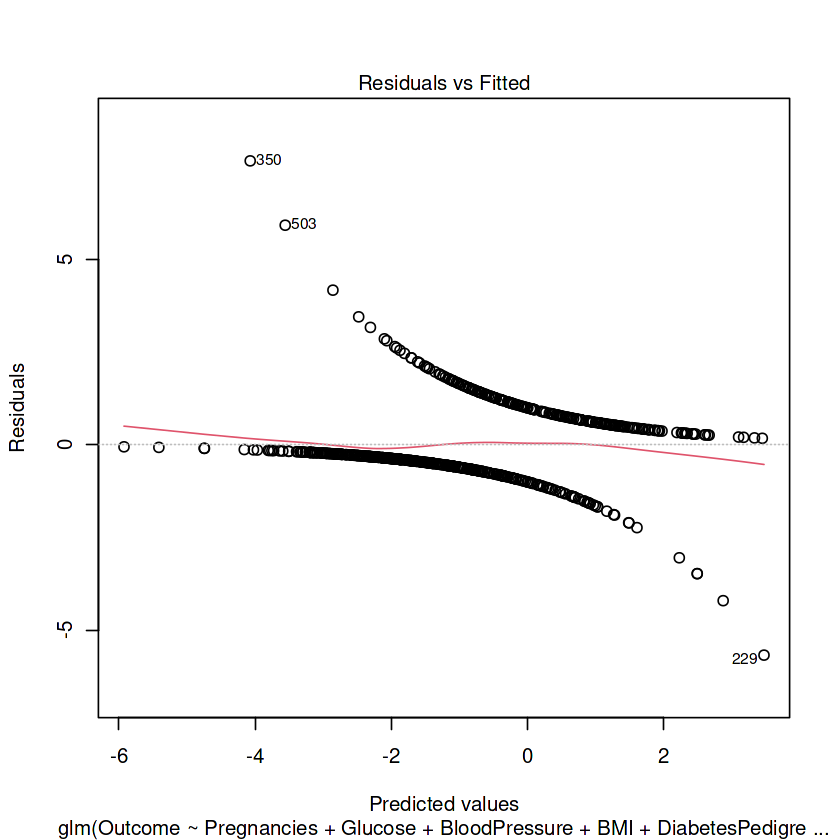

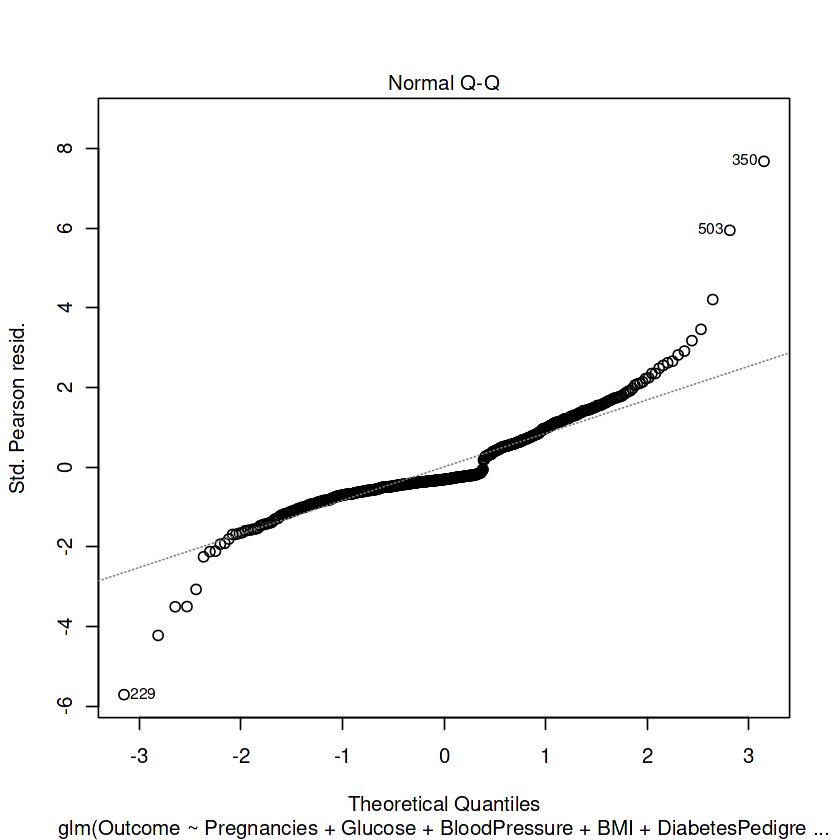

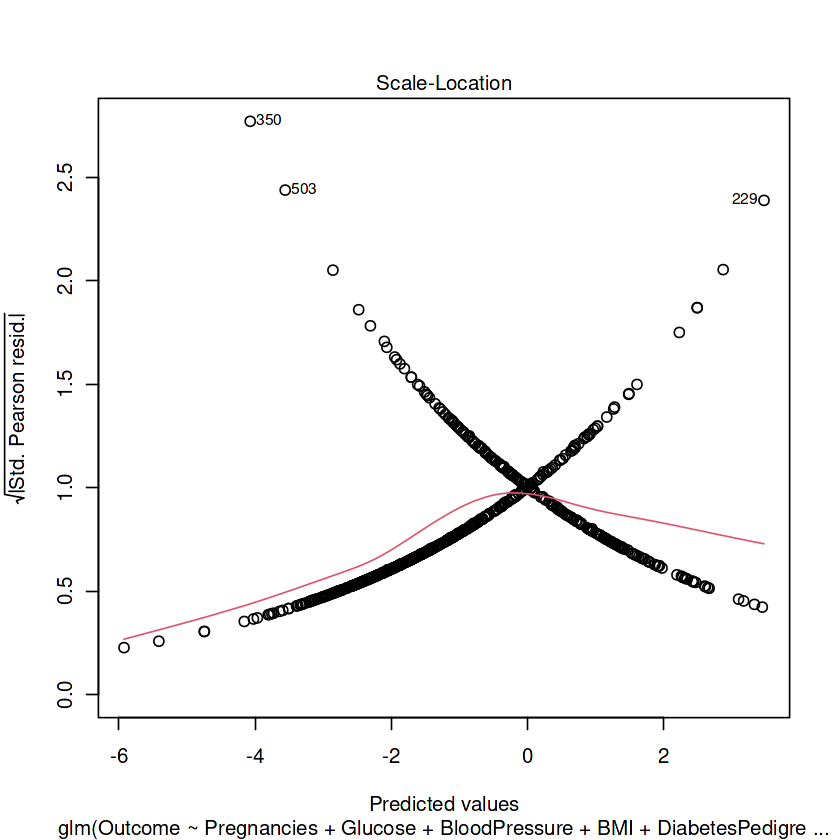

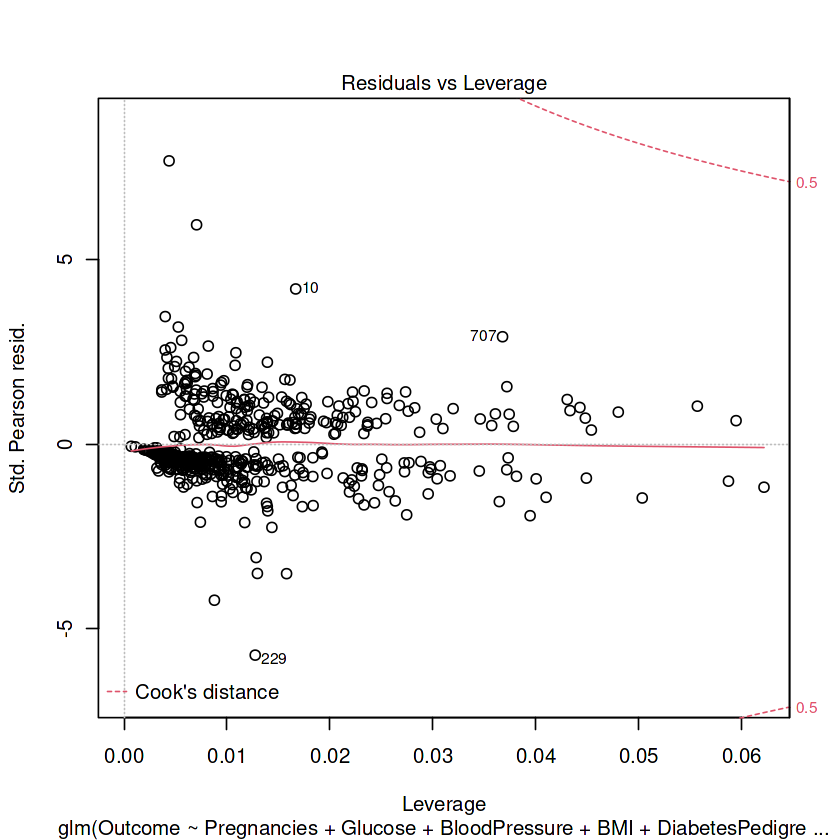

In [18]:
plot(logit.fit.reduced)

In [19]:
#predict
prob <- predict(logit.fit.reduced, testset, type = "response")
logit.pred <- factor(ifelse(prob > 0.5,1,0))
 
confusionMatrix(testset$Outcome, logit.pred)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 88 12
         1 18 35
                                          
               Accuracy : 0.8039          
                 95% CI : (0.7321, 0.8636)
    No Information Rate : 0.6928          
    P-Value [Acc > NIR] : 0.001361        
                                          
                  Kappa : 0.5551          
                                          
 Mcnemar's Test P-Value : 0.361310        
                                          
            Sensitivity : 0.8302          
            Specificity : 0.7447          
         Pos Pred Value : 0.8800          
         Neg Pred Value : 0.6604          
             Prevalence : 0.6928          
         Detection Rate : 0.5752          
   Detection Prevalence : 0.6536          
      Balanced Accuracy : 0.7874          
                                          
       'Positive' Class : 0               
                                    

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8387

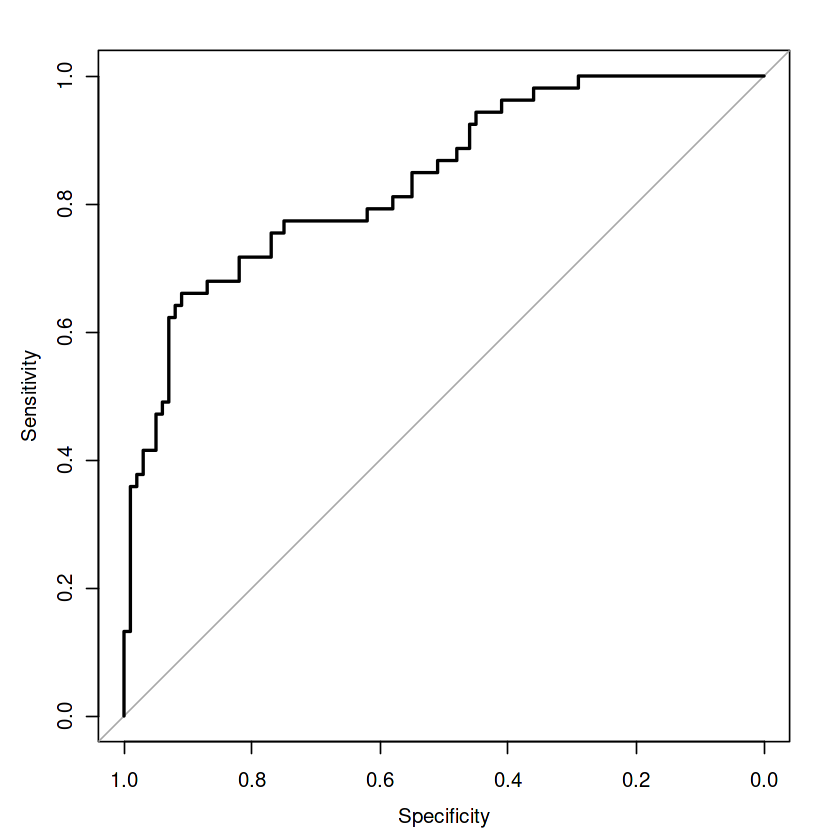

In [20]:
#roc curve
plot.roc(testset$Outcome, prob)
#auc
auc(testset$Outcome, prob)

,CP,nsplit,rel error,xerror,xstd
1,0.25581395,0,1.0000000,1.0000000,0.05500133
2,0.03953488,1,0.7441860,0.7906977,0.05158560
3,0.02635659,3,0.6651163,0.8186047,0.05213298
4,0.02325581,6,0.5860465,0.8046512,0.05186306
5,0.01860465,7,0.5627907,0.7627907,0.05100752
6,0.01705426,8,0.5441860,0.7534884,0.05080782
7,0.01162791,11,0.4930233,0.7720930,0.05120368
8,0.01000000,13,0.4697674,0.7581395,0.05090811


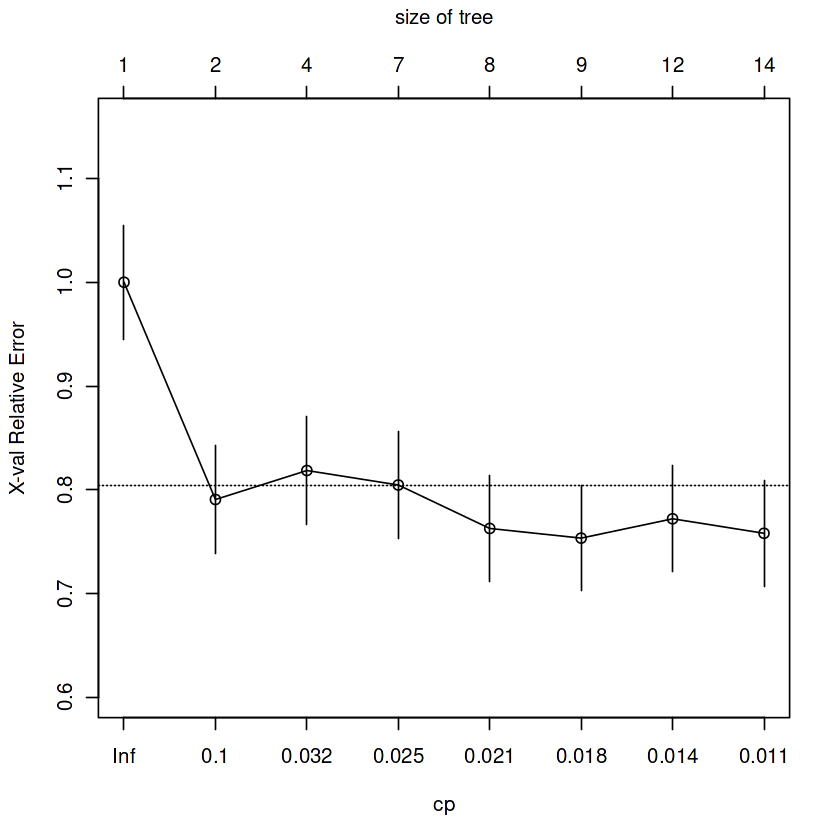

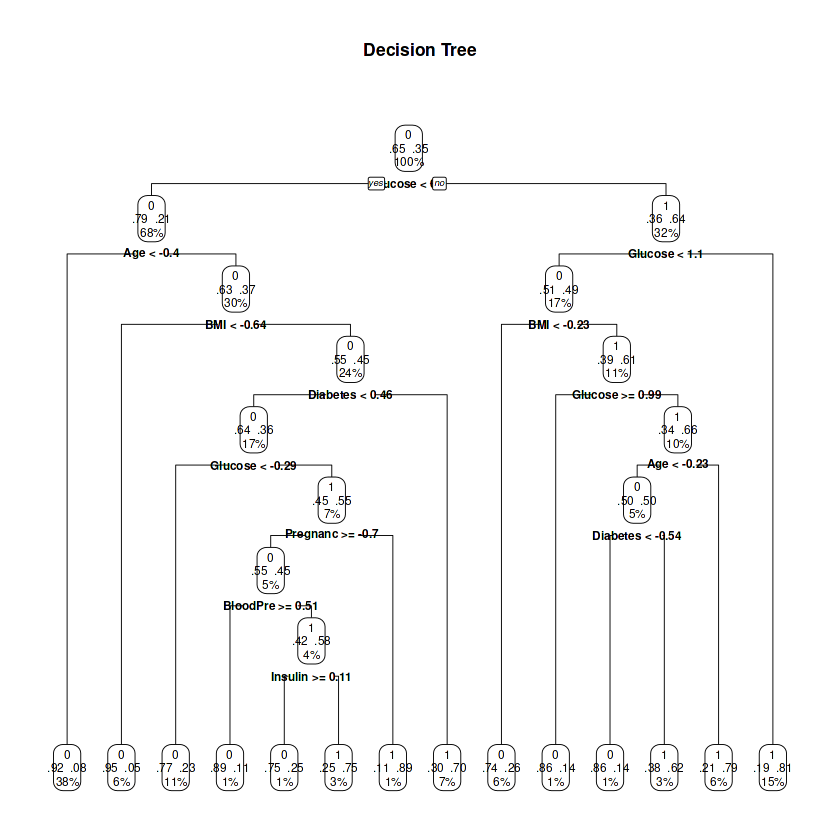

In [21]:
#decision tree
set.seed(1234)
dtree<-rpart(Outcome~.,trainset)
plotcp(dtree)
dtree$cptable
a<-c(.744-.05,.744+.05)
a
dtree.pruned <- prune(dtree, cp=.01)

prp(dtree.pruned, type = 2, extra = 104, 
 fallen.leaves = TRUE, main="Decision Tree")

In [22]:
dtree.pred <- predict(dtree.pruned, testset, type="class")
confusionMatrix(testset$Outcome, dtree.pred)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 80 20
         1 17 36
                                          
               Accuracy : 0.7582          
                 95% CI : (0.6824, 0.8237)
    No Information Rate : 0.634           
    P-Value [Acc > NIR] : 0.0007075       
                                          
                  Kappa : 0.473           
                                          
 Mcnemar's Test P-Value : 0.7423084       
                                          
            Sensitivity : 0.8247          
            Specificity : 0.6429          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.6792          
             Prevalence : 0.6340          
         Detection Rate : 0.5229          
   Detection Prevalence : 0.6536          
      Balanced Accuracy : 0.7338          
                                          
       'Positive' Class : 0               
                                    

In [23]:
#random forests
set.seed(1234)
fit.forest <- randomForest(Outcome~., data=trainset, mytry=2, importance=TRUE, do.trance=100)
print(fit.forest)


Call:
 randomForest(formula = Outcome ~ ., data = trainset, mytry = 2,      importance = TRUE, do.trance = 100) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 24.72%
Confusion matrix:
    0   1 class.error
0 336  64   0.1600000
1  88 127   0.4093023


In [24]:
forest.pred <- predict(fit.forest, testset)
confusionMatrix(testset$Outcome, forest.pred)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 87 13
         1 17 36
                                          
               Accuracy : 0.8039          
                 95% CI : (0.7321, 0.8636)
    No Information Rate : 0.6797          
    P-Value [Acc > NIR] : 0.0004303       
                                          
                  Kappa : 0.5592          
                                          
 Mcnemar's Test P-Value : 0.5838824       
                                          
            Sensitivity : 0.8365          
            Specificity : 0.7347          
         Pos Pred Value : 0.8700          
         Neg Pred Value : 0.6792          
             Prevalence : 0.6797          
         Detection Rate : 0.5686          
   Detection Prevalence : 0.6536          
      Balanced Accuracy : 0.7856          
                                          
       'Positive' Class : 0               
                                    

In [26]:
#knn
set.seed(1234)
knn.fit <- kknn(trainset$Outcome~., train = trainset[,-9], test = testset[, -9])
confusionMatrix(testset$Outcome, fitted(knn.fit))

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 77 23
         1 17 36
                                          
               Accuracy : 0.7386          
                 95% CI : (0.6615, 0.8062)
    No Information Rate : 0.6144          
    P-Value [Acc > NIR] : 0.0008284       
                                          
                  Kappa : 0.4376          
                                          
 Mcnemar's Test P-Value : 0.4291953       
                                          
            Sensitivity : 0.8191          
            Specificity : 0.6102          
         Pos Pred Value : 0.7700          
         Neg Pred Value : 0.6792          
             Prevalence : 0.6144          
         Detection Rate : 0.5033          
   Detection Prevalence : 0.6536          
      Balanced Accuracy : 0.7147          
                                          
       'Positive' Class : 0               
                                    